# DS-SF-27 | Codealong 07 | Linear Regression and Model Fit, Part 2

In [36]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)


import statsmodels.api as sm
import statsmodels.formula.api as smf

# TODO
from sklearn import feature_selection, linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

## Part A - One-hot encoding for categorical variables

In [37]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-07.csv'), index_col = 'ID')

In [38]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [30]:
smf.ols(formula = 'SalePrice ~ BathCount', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     146.6
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           1.94e-31
Time:                        19:01:02   Log-Likelihood:                -1690.7
No. Observations:                 929   AIC:                             3385.
Df Residuals:                     927   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3401      0.099      3.434      0.001         0.146     0.535
BathCount      0.5242      0.043     12.109      0.000         0.439     0.609
==============================================================================
Omnibus:                     1692.623   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2167434.305
Skew:                          12.317   Prob(JB):                         0.00
Kurtosis:                     238.345   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### What's the bathrooms' distribution in the dataset?

In [39]:
# TODO

df.BathCount.value_counts(dropna = False).sort_index()

 1.00     333
 1.10       1
 1.25       1
 1.50      37
 1.75       1
 2.00     323
 2.25       1
 2.50      44
 3.00     105
 3.50      18
         ... 
 4.50       6
 5.00      10
 5.50       2
 6.00       8
 6.50       1
 7.00       2
 7.50       1
 8.00       1
 14.00      1
NaN        42
Name: BathCount, dtype: int64

> ### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [40]:
df=df[df.BathCount.isin([1,2,3,4])]


In [41]:
# TODO

df.BathCount.value_counts(dropna = False).sort_index()

1.0    333
2.0    323
3.0    105
4.0     33
Name: BathCount, dtype: int64

> ### Let's use `pandas`'s `get_dummies` to create our one-hot encoding

In [19]:
# TODO

baths_df = pd.get_dummies(df.BathCount, prefix = 'Bath')

In [6]:
baths_df

,Bath_1.0,Bath_1.1,Bath_1.25,Bath_1.5,Bath_1.75,...,Bath_6.5,Bath_7.0,Bath_7.5,Bath_8.0,Bath_14.0
ID,,,,,,,,,,,
15063471,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
15063505,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
15063609,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
15064044,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
15064257,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
15064295,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
15064391,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
15064536,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
15064669,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [42]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
                           'Bath_2.0': 'Bath_2',
                           'Bath_3.0': 'Bath_3',
                           'Bath_4.0': 'Bath_4'}, inplace = True)

In [43]:
baths_df

,Bath_1,Bath_2,Bath_3,Bath_4
ID,,,,
15063505,0.0,1.0,0.0,0.0
15064044,1.0,0.0,0.0,0.0
15064257,0.0,1.0,0.0,0.0
15064295,0.0,1.0,0.0,0.0
15064391,1.0,0.0,0.0,0.0
15064536,0.0,1.0,0.0,0.0
15064669,0.0,0.0,1.0,0.0
15065032,1.0,0.0,0.0,0.0
15065140,1.0,0.0,0.0,0.0


In [44]:
df = df.join([baths_df])

In [45]:
df.columns

Index([u'Address', u'DateOfSale', u'SalePrice', u'IsAStudio', u'BedCount',
       u'BathCount', u'Size', u'LotSize', u'BuiltInYear', u'Bath_1', u'Bath_2',
       u'Bath_3', u'Bath_4'],
      dtype='object')

## One-hot encoding for categorical variables

> ### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [47]:
smf.ols(formula = 'SalePrice ~ Bath_2 + Bath_3 + Bath_4', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           1.49e-07
Time:                        19:25:17   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9914      0.070     14.249      0.000         0.855     1.128
Bath_2         0.2831      0.099      2.855      0.004         0.088     0.478
Bath_3         0.4808      0.142      3.383      0.001         0.202     0.760
Bath_4         1.2120      0.232      5.231      0.000         0.757     1.667
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
df[df.BathCount == 1].SalePrice.mean()

0.9914110630630633

> ### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [ ]:
smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_3 + Bath_4', data = df).fit().summary()

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [ ]:
smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_2 + Bath_4', data = df).fit().summary()

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [ ]:
smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_2 + Bath_3', data = df).fit().summary()

## Part B - Model's F-statistic

In [54]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-07.csv'), index_col = 'ID')

> ### `SalePrice` as a function of `Size`

In [55]:
# TODO

model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           2.67e-58
Time:                        19:43:17   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalePrice` as a function of `IsAStudio`

In [56]:
# TODO

model = smf.ols(formula = 'SalePrice ~ IsAStudio', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07775
Date:                Thu, 29 Sep 2016   Prob (F-statistic):              0.780
Time:                        19:43:20   Log-Likelihood:                -1847.4
No. Observations:                 986   AIC:                             3699.
Df Residuals:                     984   BIC:                             3709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.3811      0.051     27.088      0.000         1.281     1.481
IsAStudio      0.0829      0.297      0.279      0.780        -0.501     0.666
==============================================================================
Omnibus:                     1682.807   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1342290.714
Skew:                          10.942   Prob(JB):                         0.00
Kurtosis:                     182.425   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model's F-value (with significance level of `5%`)

In [ ]:
model.fvalue

### Associated p-value

In [ ]:
model.f_pvalue

## Part C1 - Linear Regression Modeling with `sklearn`

In [57]:
def summary(X, y, model):
    fvalues, f_pvalues = feature_selection.f_regression(X, y)
    print 'F-statistic (not join but instead done sequentially for each regressor)'
    print '- F-value', fvalues
    print '- p-value', f_pvalues
    print

    print 'R^2 =', model.score(X, y)
    print

    print 'Coefficients'
    print '- beta_0 (Intercept) = {}'.format(model.intercept_)
    for i, coef in enumerate(model.coef_):
        print '- beta_{} ({}) = {}'.format(i + 1, X.columns[i], coef)

> ### Remove samples with `NaN` in `IsAStudio`, `Size`, or `LotSize`

In [58]:
# TODO

df.dropna(axis = 'index', subset = ['IsAStudio', 'Size', 'LotSize'], inplace = True)

### SalePrice ~ IsAStudio with `statsmodels`

In [59]:
smf.ols(formula = 'SalePrice ~ IsAStudio', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2519
Date:                Thu, 29 Sep 2016   Prob (F-statistic):              0.616
Time:                        20:10:57   Log-Likelihood:                -1159.0
No. Observations:                 545   AIC:                             2322.
Df Residuals:                     543   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5571      0.088     17.615      0.000         1.383     1.731
IsAStudio      0.2589      0.516      0.502      0.616        -0.755     1.272
==============================================================================
Omnibus:                      860.527   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           301122.117
Skew:                           8.992   Prob(JB):                         0.00
Kurtosis:                     116.741   Cond. No.                         5.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### SalePrice ~ IsAStudio with `sklearn`

In [60]:
X = df[ ['IsAStudio'] ]
y = df.SalePrice

# TODO

model = linear_model.LinearRegression().fit(X,y)

summary(X, y, model)

F-statistic (not join but instead done sequentially for each regressor)
- F-value [ 0.25187926]
- p-value [ 0.61595836]

R^2 = 0.000463650973037

Coefficients
- beta_0 (Intercept) = 1.55707559924
- beta_1 (IsAStudio) = 0.258924400756


### SalePrice ~ Size + LotSize with `statsmodels`

In [61]:
smf.ols(formula = 'SalePrice ~ Size + LotSize', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     78.29
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           1.36e-30
Time:                        20:15:04   Log-Likelihood:                -1090.0
No. Observations:                 545   AIC:                             2186.
Df Residuals:                     542   BIC:                             2199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1902      0.173     -1.098      0.273        -0.530     0.150
Size           0.8171      0.069     11.907      0.000         0.682     0.952
LotSize        0.0500      0.037      1.362      0.174        -0.022     0.122
==============================================================================
Omnibus:                      974.589   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812622.772
Skew:                          11.225   Prob(JB):                         0.00
Kurtosis:                     190.833   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### SalePrice ~ Size + LotSize with `sklearn`

In [62]:
# TODO

X = df[ ['Size', 'LotSize'] ]
y = df.SalePrice

# TODO

model = linear_model.LinearRegression().fit(X,y)

summary(X, y, model)

F-statistic (not join but instead done sequentially for each regressor)
- F-value [ 154.47734612   11.74608887]
- p-value [  2.18094764e-31   6.55921409e-04]

R^2 = 0.224134357118

Coefficients
- beta_0 (Intercept) = -0.190237755455
- beta_1 (Size) = 0.81709073459
- beta_2 (LotSize) = 0.0500489289305


## Part C2 - Linear Regression Modeling with `sklearn` (cont.)

In [63]:
df = pd.read_csv(os.path.join('..', 'datasets', 'advertising.csv'))

In [64]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## Plots

> ### Sales ~ TV

In [ ]:
sns.lmplot(x = 'TV', y = 'Sales', data = df)

> ### Sales ~ Radio

In [ ]:
sns.lmplot(x = 'Radio', y = 'Sales', data = df)

> ### Sales ~ Newspaper

In [ ]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df)

## Simple linear regressions

> ### Sales ~ TV

In [ ]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()

model_tv.summary()

> ### Sales ~ Radio

In [ ]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()

model_radio.summary()

> ### Sales ~ Newspaper

In [ ]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()

model_newspaper.summary()

## Residuals

> ### Sales ~ TV

In [ ]:
sm.qqplot(model_tv.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_tv, 'TV')

pass

> ### Sales ~ Radio

In [ ]:
sm.qqplot(model_radio.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_radio, 'Radio')

pass

> ### Sales ~ Newspaper

In [ ]:
sm.qqplot(model_newspaper.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_newspaper, 'Newspaper')

pass

> ### Sales ~ TV + Radio + Newspaper

In [65]:
# TODO

model= smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           8.35e-95
Time:                        20:26:05   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000         2.325     3.580
TV             0.0457      0.001     32.293      0.000         0.043     0.048
Radio          0.1886      0.009     21.772      0.000         0.171     0.206
Newspaper     -0.0012      0.006     -0.187      0.852        -0.014     0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Sales ~ TV + Radio

In [66]:
model_newspaper = smf.ols(formula = 'Sales ~ TV + Radio', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           8.35e-95
Time:                        20:29:18   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000         2.325     3.580
TV             0.0457      0.001     32.293      0.000         0.043     0.048
Radio          0.1886      0.009     21.772      0.000         0.171     0.206
Newspaper     -0.0012      0.006     -0.187      0.852        -0.014     0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

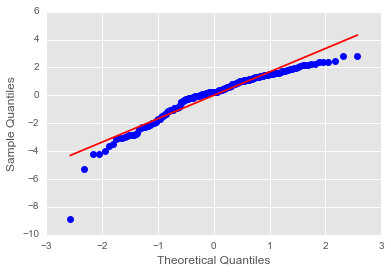

In [67]:
sm.qqplot(model.resid, line = 's')

pass

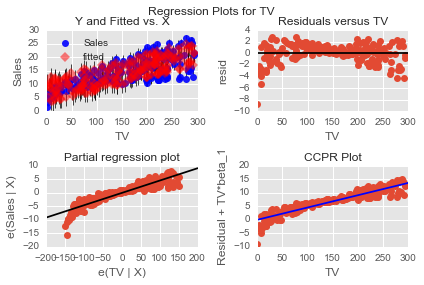

In [68]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

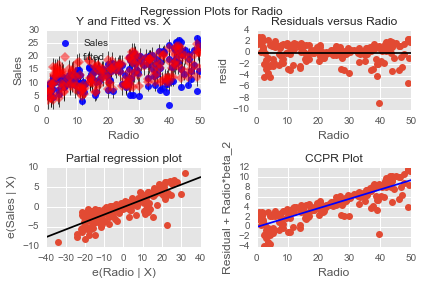

In [69]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

## Part D - Interaction Effects

### Sales ~ TV + Radio + TV * Radio

In [70]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1934.
Date:                Thu, 29 Sep 2016   Prob (F-statistic):          3.19e-144
Time:                        20:34:57   Log-Likelihood:                -267.07
No. Observations:                 198   AIC:                             542.1
Df Residuals:                     194   BIC:                             555.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7577      0.247     27.304      0.000         6.270     7.246
TV             0.0190      0.002     12.682      0.000         0.016     0.022
Radio          0.0276      0.009      3.089      0.002         0.010     0.045
TV:Radio       0.0011   5.27e-05     20.817      0.000         0.001     0.001
==============================================================================
Omnibus:                      126.182   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.060
Skew:                          -2.306   Prob(JB):                    1.12e-250
Kurtosis:                      13.875   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

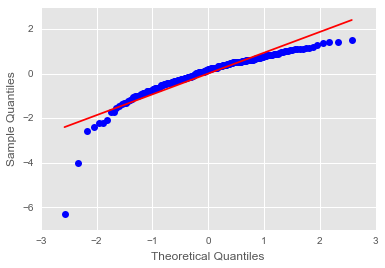

In [71]:
sm.qqplot(model.resid, line = 's')

pass

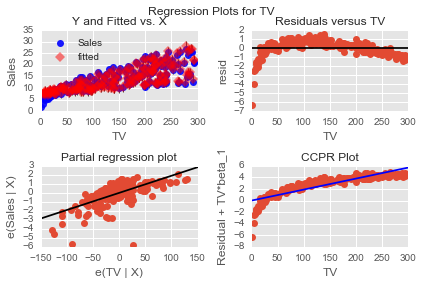

In [72]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV:Radio')

pass